<a href="https://colab.research.google.com/github/diyar95-max/Hama-/blob/main/notebook9e5361246c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

diyar123_student_path = kagglehub.dataset_download('diyar123/student')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
print(os.listdir('../input'))

['student']


In [ ]:
import pandas as pd
import os

# Automatically find the dataset file in the Kaggle input directory
file_path = None
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'student' in filename.lower() and filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            break

# Load the CSV file into a pandas DataFrame
if file_path:
    df = pd.read_csv(file_path)

    # Display basic information about the dataset
    print("✅ Dataset Loaded:", file_path)
    print("\nDataset Info:")
    print(df.info())

    # Display the first few rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Display basic statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

else:
    print("❌ CSV file not found in the /kaggle/input directory.")

# Optional: List all files in /kaggle/input
print("\nFiles in /kaggle/input:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


✅ Dataset Loaded: /kaggle/input/student/student_habits_performance.csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_leve

In [ ]:
print(df.columns.tolist())

['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'High_Performer', 'target', 'high_grade']


In [ ]:
# Show basic info
print(df.info())
print("\nFirst 5 rows:")
print(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
# Copy the dataset and encode string (object) columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Optional: check encoding result
print("\nEncoded dataset sample:")
print(df_encoded.head())



Encoded dataset sample:
   student_id  age  gender  study_hours_per_day  social_media_hours  \
0           0   23       0                  0.0                 1.2   
1           1   20       0                  6.9                 2.8   
2           2   21       1                  1.4                 3.1   
3           3   23       0                  1.0                 3.9   
4           4   19       0                  5.0                 4.4   

   netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0            1.1              0                   85.0          8.0   
1            2.3              0                   97.3          4.6   
2            1.3              0                   94.8          8.0   
3            1.0              0                   71.0          9.2   
4            0.5              0                   90.9          4.9   

   diet_quality  exercise_frequency  parental_education_level  \
0             0                   6                     

In [ ]:
# Step 1: Find and load dataset
file_path = None
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'student' in filename.lower() and filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            break

if file_path:
    df = pd.read_csv(file_path)
    print("✅ Dataset Loaded:", file_path)
    print("\nColumns in dataset:")
    print(df.columns.tolist())
else:
    raise FileNotFoundError("❌ CSV file not found in the /kaggle/input directory.")

✅ Dataset Loaded: /kaggle/input/student/student_habits_performance.csv

Columns in dataset:
['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']



Missing Values:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
High_Performer                    0
target                            0
high_grade                        0
dtype: int64


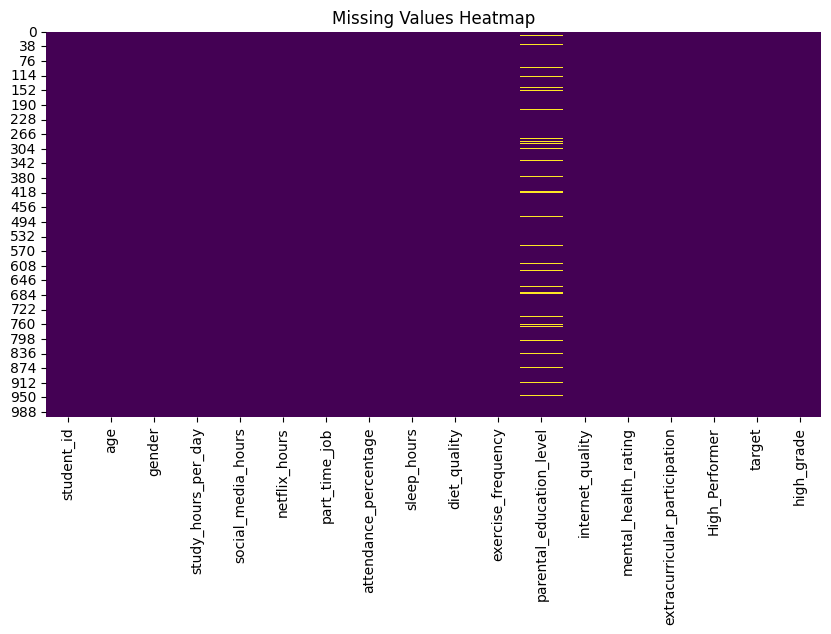

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())

# Visual overview of missing data (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


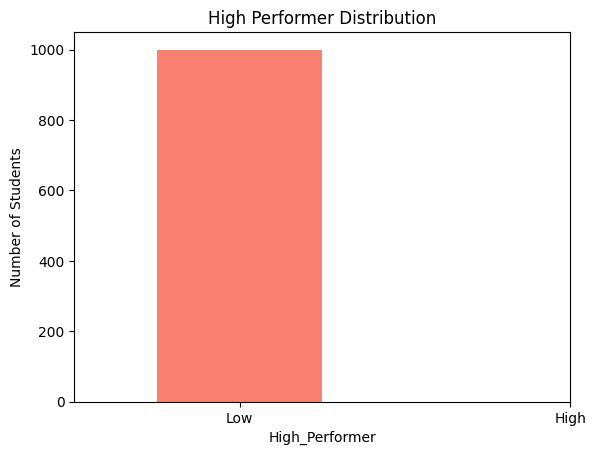

In [ ]:
# Binary target distribution
df['High_Performer'] = df['High_Performer'].astype(int)  # Ensure it's binary
df['High_Performer'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xticks([0, 1], ['Low', 'High'], rotation=0)
plt.title("High Performer Distribution")
plt.ylabel("Number of Students")
plt.show()


In [ ]:
# Numeric summary
df.describe()


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,High_Performer,target,high_grade
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,1.0,1.0,1.0
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,0.0,0.0,0.0
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,1.0,1.0,1.0
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,1.0,1.0,1.0
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,1.0,1.0,1.0
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,1.0,1.0,1.0
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,1.0,1.0,1.0


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


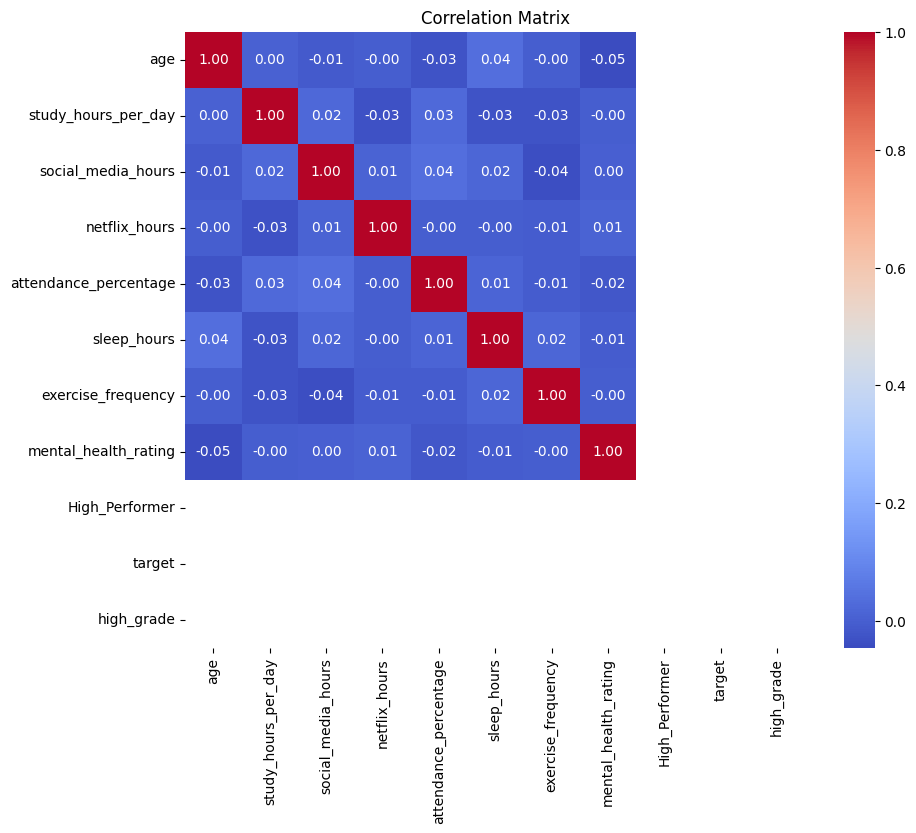

In [ ]:
# Compute correlation only for numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


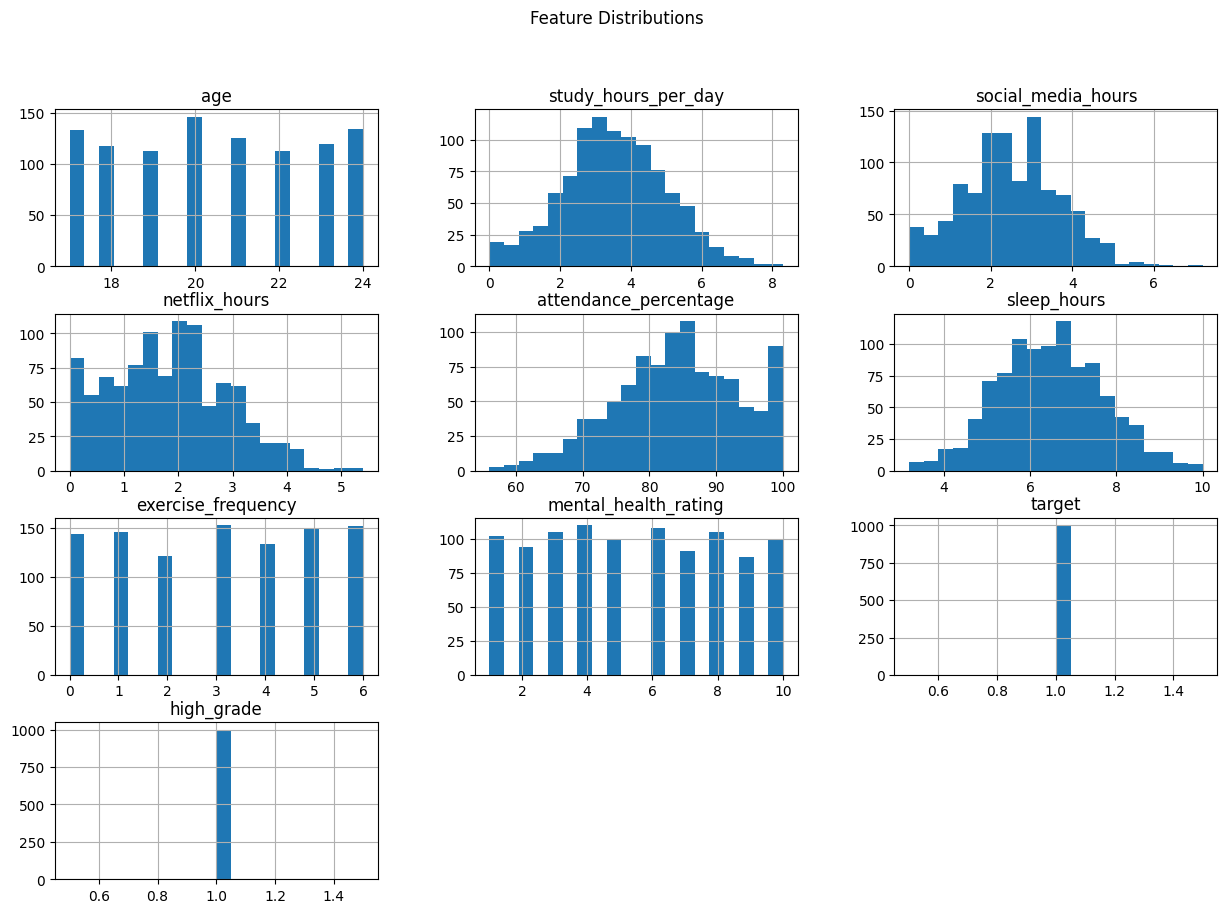

In [ ]:
# Histograms for numerical features
numeric_df.drop(columns=['High_Performer'], errors='ignore').hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


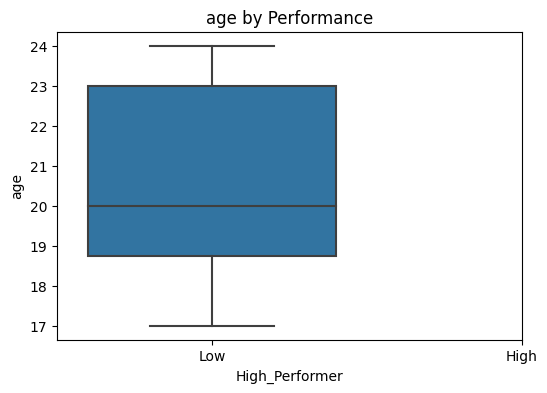

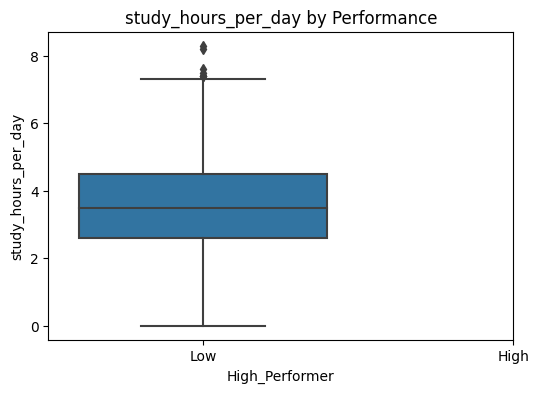

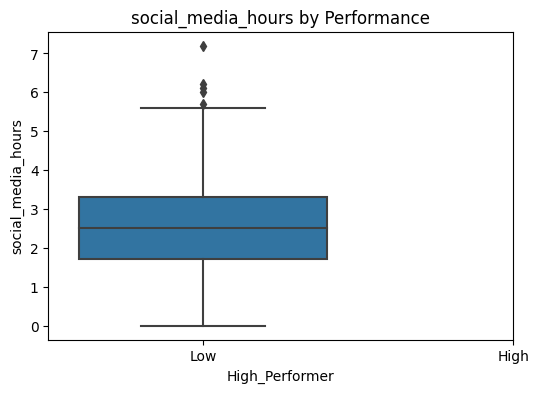

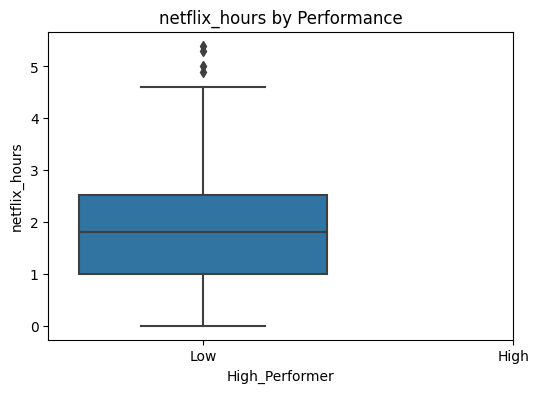

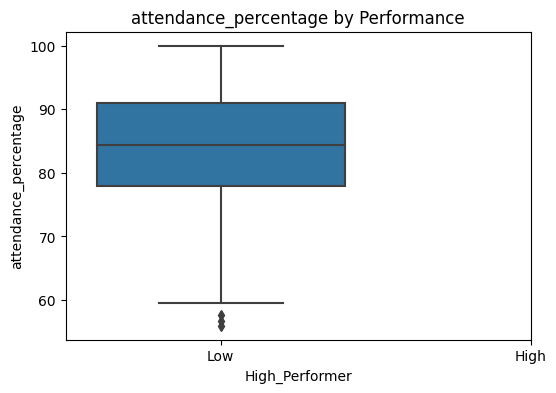

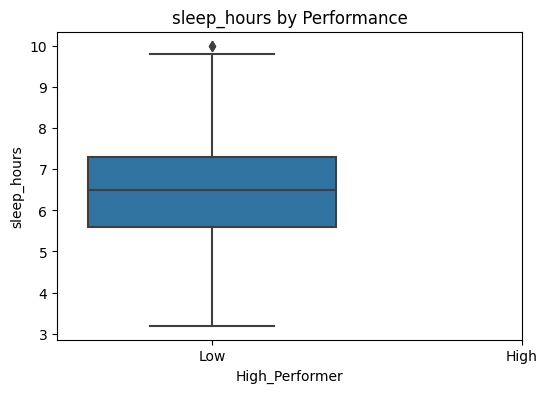

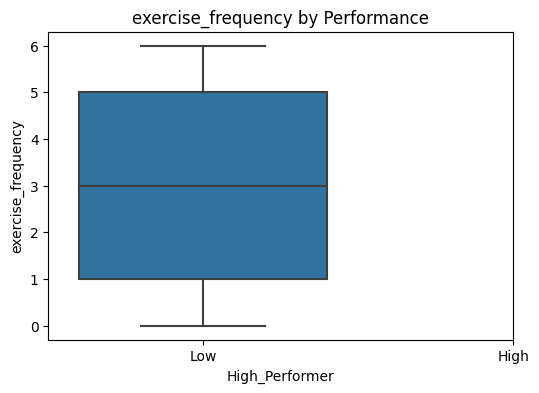

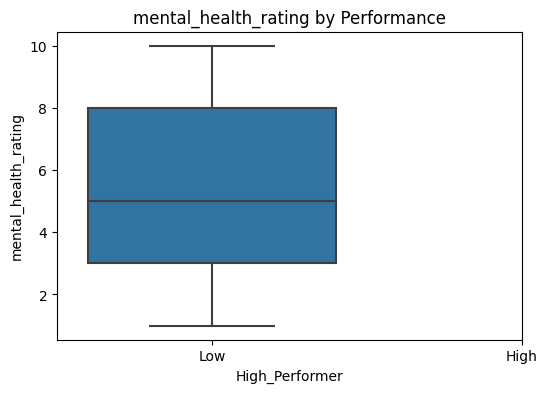

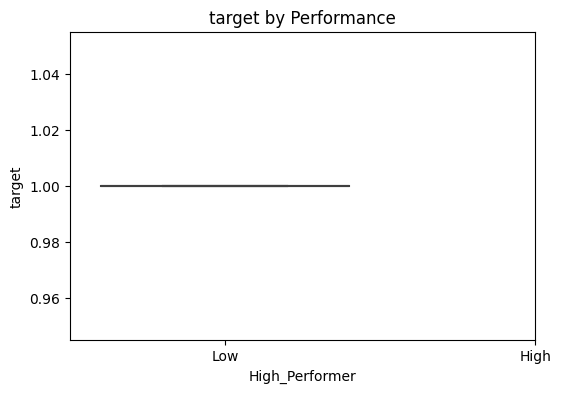

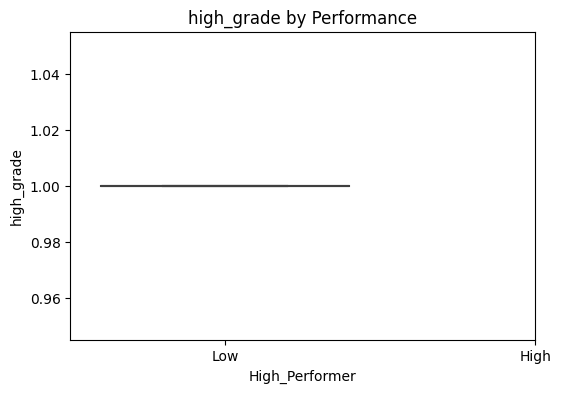

In [ ]:
# Compare numeric features by performance
for col in numeric_df.columns:
    if col != 'High_Performer':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='High_Performer', y=col, data=df)
        plt.xticks([0, 1], ['Low', 'High'])
        plt.title(f"{col} by Performance")
        plt.show()


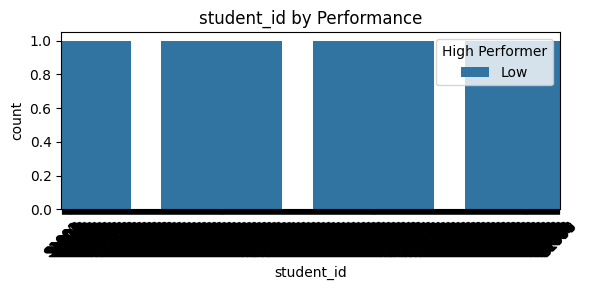

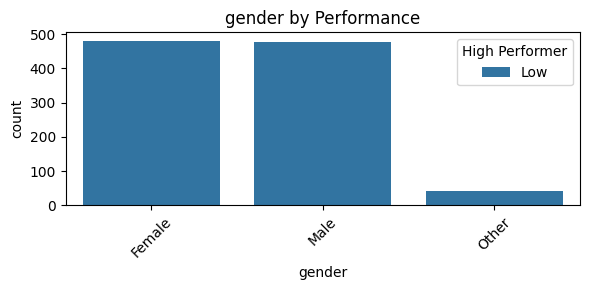

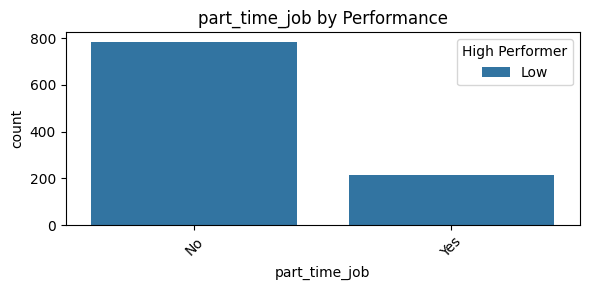

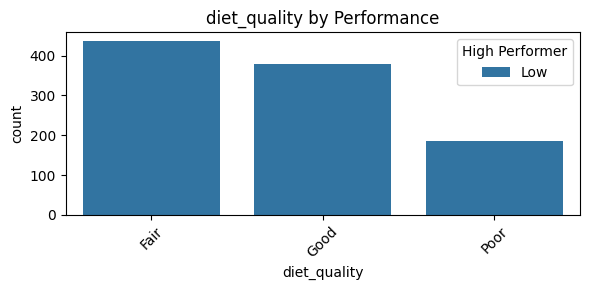

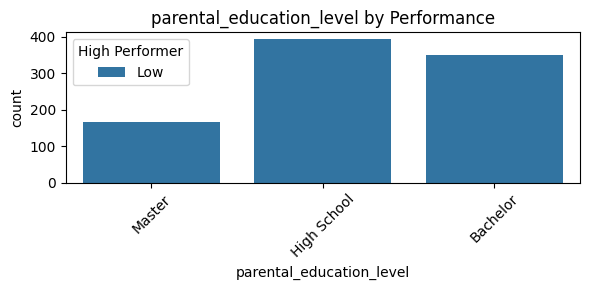

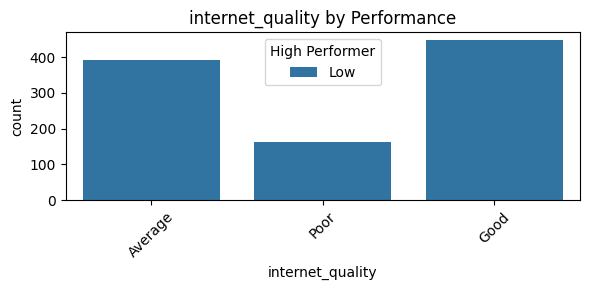

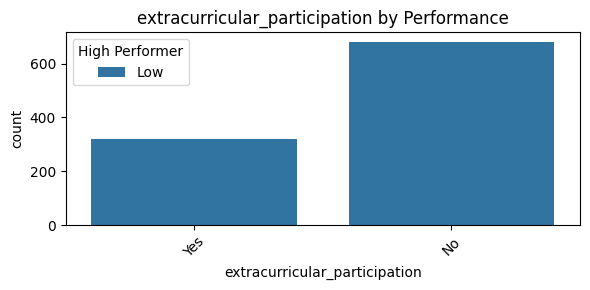

In [ ]:
# Bar plots for categorical features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='High_Performer', data=df)
    plt.title(f"{col} by Performance")
    plt.xticks(rotation=45)
    plt.legend(title='High Performer', labels=['Low', 'High'])
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

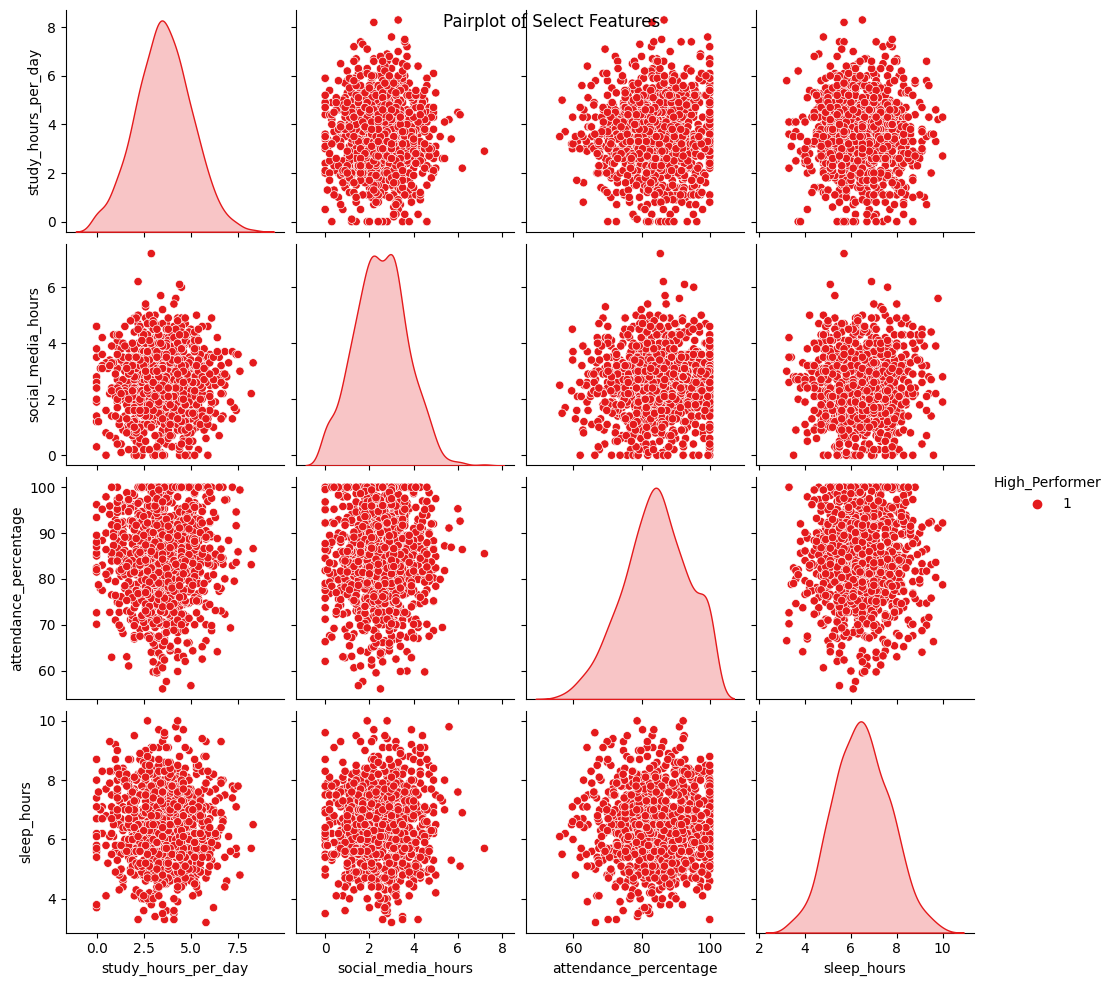

In [ ]:
# Only for a small number of numerical columns
import seaborn as sns

selected_cols = ['study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'High_Performer']
sns.pairplot(df[selected_cols], hue='High_Performer', palette='Set1')
plt.suptitle("Pairplot of Select Features")
plt.show()


In [ ]:
# Check unique values in the High_Performer column
print("Unique values in 'High_Performer':", df['High_Performer'].unique())

# If values are already 1/0, you can use them directly:
df['target'] = df['High_Performer'].astype(int)


Unique values in 'High_Performer': [1]


In [ ]:
df['high_grade'] = df['High_Performer'].astype(int)


In [ ]:
print(df['High_Performer'].unique())


[1]


In [ ]:
# Drop columns not useful for prediction (e.g., ID and target)
X = df.drop(columns=['student_id', 'High_Performer', 'target'])

# Save target
y = df['target']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy Score: 1.0


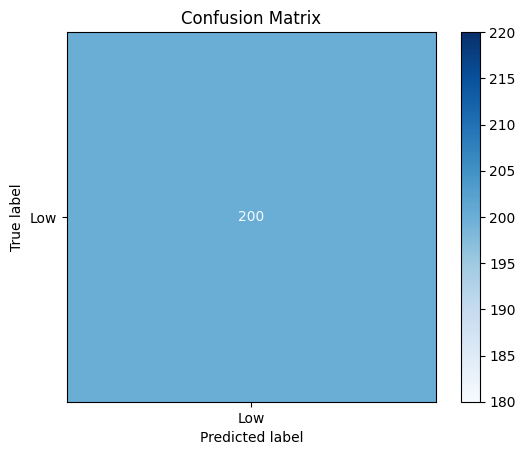

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = model.predict(X_test_scaled)

# Print classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Automatically detect the present class labels in test set
labels = np.unique(y_test)

# Create confusion matrix and display
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"][:len(labels)])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



In [ ]:
import pandas as pd

data = {
    'age': [17, 18, 17, 16],
    'gender': ['male', 'female', 'female', 'male'],
    'study_hours_per_day': [3, 4, 2, 5],
    'social_media_hours': [2, 1, 3, 1],
    'netflix_hours': [1, 0, 2, 1],
    'part_time_job': ['yes', 'no', 'no', 'yes'],
    'attendance_percentage': [90, 95, 80, 85],
    'sleep_hours': [7, 8, 6, 7],
    'diet_quality': ['average', 'good', 'poor', 'good'],
    'parental_education_level': ['high_school', 'college', 'high_school', 'college'],
    'internet_quality': ['good', 'excellent', 'poor', 'good'],
    'mental_health_rating': [6, 8, 4, 7],
    'extracurricular_participation': ['yes', 'yes', 'no', 'yes'],
    'performance_label': ['High Performer', 'High Performer', 'Low Performer', 'High Performer']
}

df = pd.DataFrame(data)
df.to_csv("student_performance.csv", index=False)
print("✅ Sample dataset created.")


# STEP 0: Load dataset
df = pd.read_csv("student_performance.csv")  # Replace with your dataset path
print(df.head())
# STEP 2: Preprocessing
X = df.drop("performance_label", axis=1)
y = df["performance_label"]

# Encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le




✅ Sample dataset created.
   age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   17    male                    3                   2              1   
1   18  female                    4                   1              0   
2   17  female                    2                   3              2   
3   16    male                    5                   1              1   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0           yes                     90            7      average   
1            no                     95            8         good   
2            no                     80            6         poor   
3           yes                     85            7         good   

  parental_education_level internet_quality  mental_health_rating  \
0              high_school             good                     6   
1                  college        excellent                     8   
2              high_school             poor            

In [ ]:
# Features: drop the target column
X = df.drop(columns=['High_Performer', 'student_id'])  # drop ID too if not useful

# Target:
y = df['High_Performer']

# Encode categorical columns if any (e.g., 'gender', 'parental_education_level')
from sklearn.preprocessing import LabelEncoder

df_encoded = X.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

X_encoded = df_encoded

# Now proceed to split, scale, train model, etc.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
X_encoded = X.copy()

for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le  # save for future use


In [ ]:
# Sample input (may include extra fields)
sample = pd.DataFrame([{
    'age': 17,
    'gender': 'male',
    'study_hours_per_day': 3,
    'social_media_hours': 2,
    'netflix_hours': 1,
    'part_time_job': 'yes',
    'attendance_percentage': 90,
    'sleep_hours': 7,
    'diet_quality': 'average',
    # 'exercise_frequency' is NOT in training data
    'parental_education_level': 'high_school',
    'internet_quality': 'good',
    'mental_health_rating': 6,
    'extracurricular_participation': 'yes'
}])

# STEP 1: Keep only columns used in training
sample = sample[[col for col in sample.columns if col in X.columns]]

# STEP 2: Add missing columns (if any), and fill with default values
for col in X.columns:
    if col not in sample.columns:
        sample[col] = 0  # or any default value (e.g., 'unknown')

# STEP 3: Encode categorical columns using saved encoders
for col in sample.select_dtypes(include='object').columns:
    le = label_encoders[col]
    try:
        sample[col] = le.transform(sample[col])
    except ValueError:
        print(f"⚠️ Unknown category in '{col}': {sample[col].values[0]}")
        sample[col] = -1  # unknown value fallback

# STEP 4: Ensure column order matches training
sample = sample[X.columns]

# STEP 5: Scale and predict
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0]
print("Prediction:", "High Performer" if pred == 1 else "Low Performer")


⚠️ Unknown category in 'gender': male
⚠️ Unknown category in 'part_time_job': yes
⚠️ Unknown category in 'diet_quality': average
⚠️ Unknown category in 'parental_education_level': high_school
⚠️ Unknown category in 'internet_quality': good
⚠️ Unknown category in 'extracurricular_participation': yes
Prediction: High Performer
